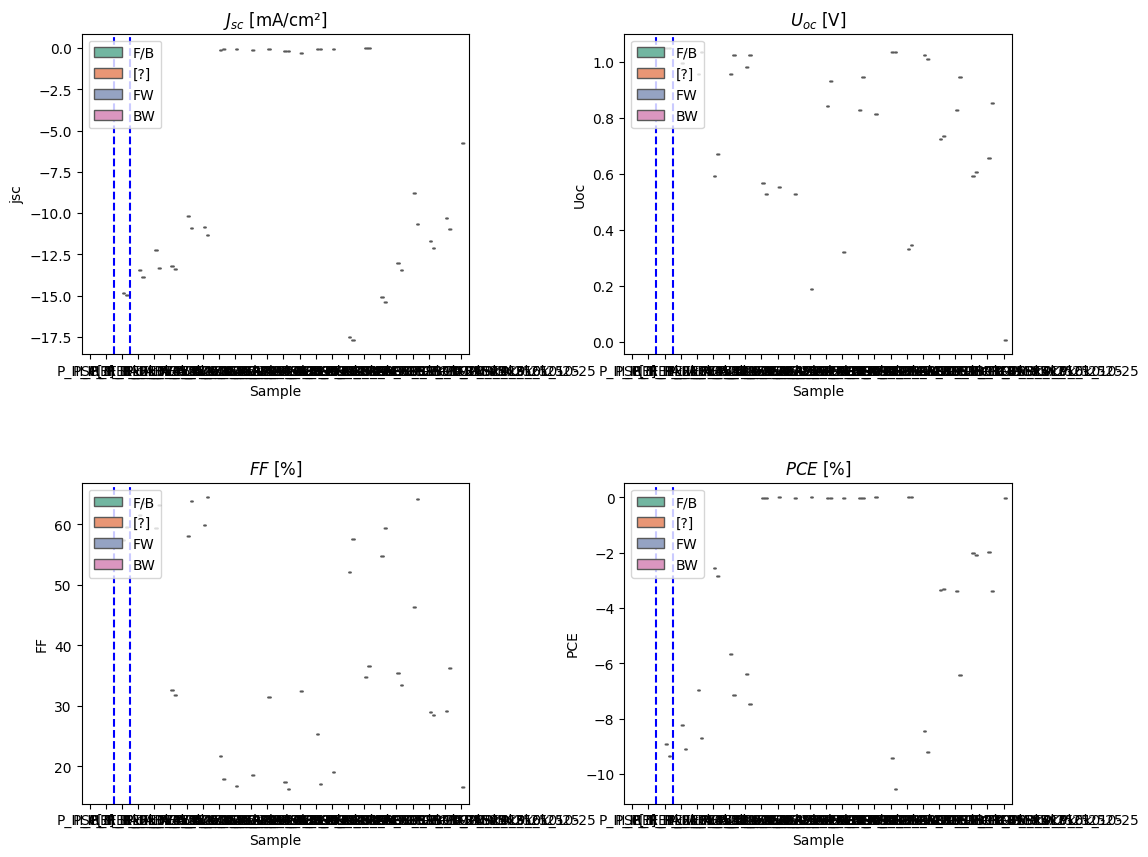

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database and load data into a DataFrame
conn = sqlite3.connect('Uzduotis.db')
query = """
    SELECT field1 AS Sample, field2 AS Direction, field3 AS Uoc, 
           field4 AS jsc, field5 AS FF, field8 AS PCE 
    FROM '2024_10_25_17val44min_III_P_K_A_params'
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert necessary columns to numeric for plotting
df['Uoc'] = pd.to_numeric(df['Uoc'], errors='coerce')
df['jsc'] = pd.to_numeric(df['jsc'], errors='coerce')
df['FF'] = pd.to_numeric(df['FF'], errors='coerce')
df['PCE'] = pd.to_numeric(df['PCE'], errors='coerce')

# Initialize a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the color palette
sns.set_palette("Set2")

# Plot for jsc
sns.boxplot(data=df, x='Sample', y='jsc', hue='Direction', ax=axes[0, 0])
axes[0, 0].set_title(r"$J_{sc}$ [mA/cm²]")
axes[0, 0].axvline(1.5, color="blue", linestyle="--")
axes[0, 0].axvline(2.5, color="blue", linestyle="--")
axes[0, 0].legend(loc='upper left')

# Plot for Uoc
sns.boxplot(data=df, x='Sample', y='Uoc', hue='Direction', ax=axes[0, 1])
axes[0, 1].set_title(r"$U_{oc}$ [V]")
axes[0, 1].axvline(1.5, color="blue", linestyle="--")
axes[0, 1].axvline(2.5, color="blue", linestyle="--")
axes[0, 1].legend(loc='upper left')

# Plot for FF
sns.boxplot(data=df, x='Sample', y='FF', hue='Direction', ax=axes[1, 0])
axes[1, 0].set_title(r"$FF$ [%]")
axes[1, 0].axvline(1.5, color="blue", linestyle="--")
axes[1, 0].axvline(2.5, color="blue", linestyle="--")
axes[1, 0].legend(loc='upper left')

# Plot for PCE
sns.boxplot(data=df, x='Sample', y='PCE', hue='Direction', ax=axes[1, 1])
axes[1, 1].set_title(r"$PCE$ [%]")
axes[1, 1].axvline(1.5, color="blue", linestyle="--")
axes[1, 1].axvline(2.5, color="blue", linestyle="--")
axes[1, 1].legend(loc='upper left')

# Show the plots
plt.show()
